In [1]:
pip install tf_keras, deepface #installing the Libraries 

Defaulting to user installation because normal site-packages is not writeable
ERROR: Invalid requirement: 'tf_keras,'
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib # install matplotlib to display images

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


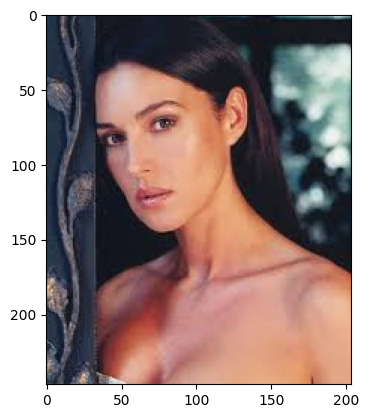

In [7]:
import matplotlib.pyplot as plt
img1=plt.imread("img1.jpg") #reading the images
img2=plt.imread("img2.jpg")
plt.imshow(img1) #displaying the images

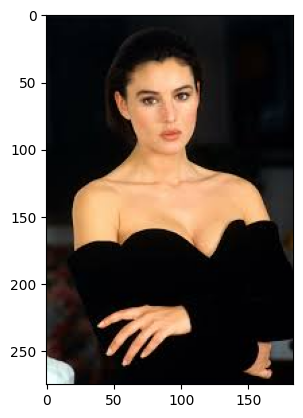

In [6]:
plt.imshow(img2)

In [9]:
from deepface import DeepFace #importing dependencies
detector_backends = [ 'opencv', 'retinaface',
        'mtcnn', 'ssd', 'dlib', 'mediapipe', 'yolov8', 'centerface'] # or 'skip' (default is opencv). 

2024-06-03 10:58:26.209277: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 10:58:26.457804: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 10:58:27.238071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
faces=DeepFace.extract_faces("img1.jpg") #using extract_faces function to extract faces using default opencv as backend detector
faces #we can use any backend_detector and pass it in extract faces function from above list

#Example
retina_face=DeepFace.extract_faces("img1.jpg",detector_backend="retinaface")
retina_face

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

In [12]:
models = ["VGG-Face","Facenet","Facenet512","OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace","GhostFaceNet"]
#You can adjust the threshold according to your use case. Print the result and see the distance values. Then, you can decide the optimal threshold for your project.
#you can use any of the these models for verify and find methods for recognition
from deepface import DeepFace
fr_result = DeepFace.verify("img1.jpg","img2.jpg",model_name='VGG-Face')
print(fr_result)

{'verified': True, 'distance': 0.5945624754563705, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 17, 'y': 38, 'w': 101, 'h': 101, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 55, 'y': 36, 'w': 67, 'h': 67, 'left_eye': None, 'right_eye': None}}, 'time': 1.49}


In [5]:
dfs = DeepFace.find(
  img_path = "img1.jpg",
  db_path = "db"
)
print(dfs) #find is a method which can be used for searching a face against a folder of faces. 
#It returns the highest matches with distances with respect to given image

24-06-02 00:20:04 - Searching img1.jpg in 1 length datastore
24-06-02 00:20:05 - find function duration 0.5101637840270996 seconds
[      identity                                      hash  target_x  target_y  \
0  db/img2.jpg  22aa7ee15d5acb5cf36d04b8ffe68149fd76f992        55        36   

   target_w  target_h  source_x  source_y  source_w  source_h  threshold  \
0        67        67        17        38       101       101       0.68   

   distance  
0  0.594562  ]


In [6]:
#Facial Analysis ; analyze method takes image as input and downloads needed models from deepface if it is first time
# and then takes actions parameter in which we have to specify "age", "gender","race","emotion"
objs = DeepFace.analyze(
  img_path = "img1.jpg", 
  actions = ['age', 'gender', 'race', 'emotion'],
)
print(objs)

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

Action: emotion: 100%|██████████| 4/4 [00:17<00:00,  4.36s/it]

[{'age': 32, 'region': {'x': 17, 'y': 38, 'w': 101, 'h': 101, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.96, 'gender': {'Woman': 99.89277720451355, 'Man': 0.10722607839852571}, 'dominant_gender': 'Woman', 'race': {'asian': 0.31468248926103115, 'indian': 2.345060743391514, 'black': 0.10292140068486333, 'white': 45.818862318992615, 'middle eastern': 31.97084665298462, 'latino hispanic': 19.447627663612366}, 'dominant_race': 'white', 'emotion': {'angry': 0.048330915219749186, 'disgust': 5.168795330639883e-08, 'fear': 0.04037788704189515, 'happy': 0.10273390156222563, 'sad': 0.07271875808201633, 'surprise': 5.565872716460882e-05, 'neutral': 99.73577860167282}, 'dominant_emotion': 'neutral'}]


In [7]:
#Facial Embeddings, represent method gives us the embeddings of a face or multiple embeddings of faces in a given image. These can be used for 
#representation of face with out actual image and can be used for facial recognition tasks in real time and we don't want push exact faces instead we can use these embeddings.
embedding_objs = DeepFace.represent(
  img_path = "img1.jpg",
  model_name = models[2],
)
#These can be used for clustering, finding similarity between faces, vector operations, by storing in a vector database for faster retrieval, etc.
embedding_objs     

[{'embedding': [0.025623973459005356,
   0.8961919546127319,
   -1.4654208421707153,
   -1.7779101133346558,
   -0.21962282061576843,
   -0.9468388557434082,
   0.46590739488601685,
   1.8108824491500854,
   0.8395329713821411,
   -0.13068914413452148,
   -2.9621875286102295,
   -1.4350425004959106,
   -0.7722054719924927,
   -1.7013216018676758,
   -1.757792353630066,
   -0.8941400647163391,
   1.100427269935608,
   0.5376356244087219,
   -0.08535608649253845,
   -1.7103090286254883,
   -0.218755841255188,
   -0.11053387075662613,
   -1.0325137376785278,
   1.2746031284332275,
   0.42809340357780457,
   -0.43088799715042114,
   -0.7199679017066956,
   0.37402281165122986,
   0.11187539994716644,
   -0.628150224685669,
   -1.0311368703842163,
   -1.0297750234603882,
   0.2234799563884735,
   -1.0506746768951416,
   1.8371073007583618,
   1.4230091571807861,
   -0.4109804332256317,
   -0.9821683168411255,
   -0.07073799520730972,
   0.3794969916343689,
   0.16043424606323242,
   1.24829